<a href="https://colab.research.google.com/github/BOUSBOULA-MOUAD/DS-2025/blob/main/Athlete_Performance_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q kagglehub[pandas-datasets]


In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# ✅ CORRECT METHOD (dataset_load, not load_dataset)
# The 'path' argument is missing, which specifies the file within the dataset to load.
# Using 'sports_performance_data.csv' based on the DATA_PATH variable in the kernel state.
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "zadafiyabhrami/athlete-performance-prediction-dataset",
    "sports_performance_data.csv" # Added the missing 'path' argument
)

print("✅ Dataset loaded successfully")
print(df.shape)
df.head()

Using Colab cache for faster access to the 'athlete-performance-prediction-dataset' dataset.
✅ Dataset loaded successfully
(12600, 21)


,Athlete_ID,Athlete_Name,Sport_Type,Event,Training_Hours_per_Week,Average_Heart_Rate,BMI,Sleep_Hours_per_Night,Daily_Caloric_Intake,Hydration_Level,...,Previous_Competition_Performance,Training_Intensity,Resting_Heart_Rate,Body_Fat_Percentage,VO2_Max,Event_Distance,Altitude_Training,Mental_Focus_Level,Competition_Date,Performance_Metric
0,A754,Athlete_15,Running,50m Freestyle,18.11,192.6,29.6,7.6,1890.0,57.8,...,5.81,Low,92.0,20.0,65.4,151.89,Low,9.7,2024-05-29,83.24
1,A792,Athlete_95,Soccer,NaN,12.43,77.3,18.7,NaN,2811.9,71.6,...,29.12,Medium,76.7,8.5,44.6,1863.49,NaN,5.1,2024-07-05,78.52
2,A195,Athlete_28,Swimming,100m Sprint,11.99,127.1,26.8,NaN,3018.9,58.5,...,6.51,Low,96.9,29.1,70.4,1557.84,High,1.9,2024-03-30,68.42
3,A559,Athlete_76,Cycling,100m Sprint,20.41,68.3,24.9,4.2,3773.3,62.9,...,66.25,High,NaN,18.0,57.3,965.03,High,9.7,2024-01-28,77.51
4,A384,Athlete_20,Swimming,50m Freestyle,37.88,184.2,27.0,9.5,1721.2,59.8,...,4.52,Low,59.5,14.7,43.6,4152.25,High,4.2,2024-06-01,NaN


✅ Libraries imported
✅ Dataset loaded: (12600, 21)
✅ Target variable created
✅ Missing values handled


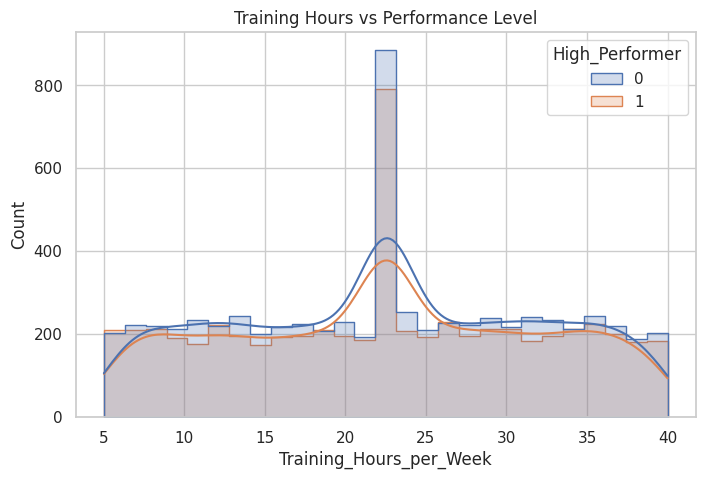

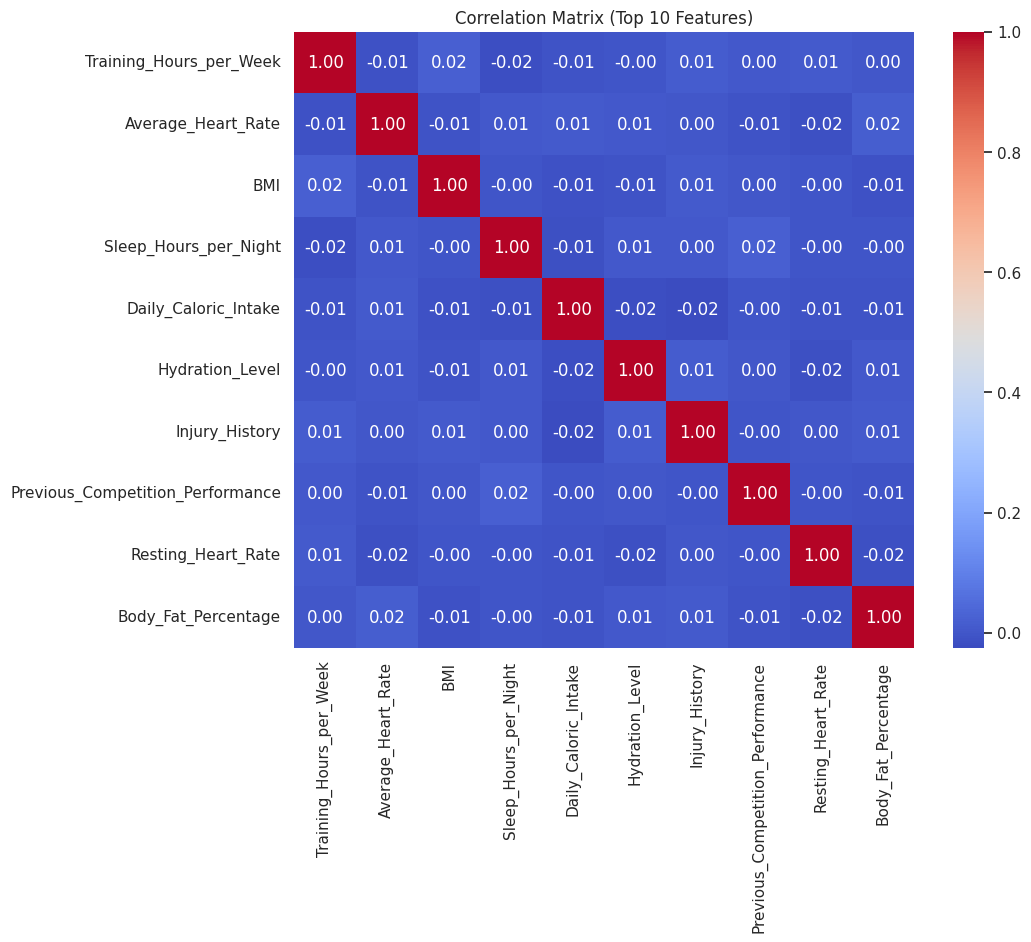

✅ Data split completed

🌲 Random Forest Accuracy: 0.9702380952380952
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1322
           1       1.00      0.94      0.97      1198

    accuracy                           0.97      2520
   macro avg       0.97      0.97      0.97      2520
weighted avg       0.97      0.97      0.97      2520



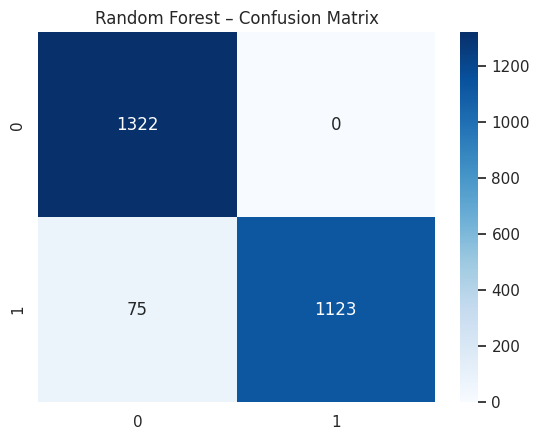


📈 Linear Regression R²: -0.0023610952874812963
📈 Linear Regression MSE: 762.5882387199698


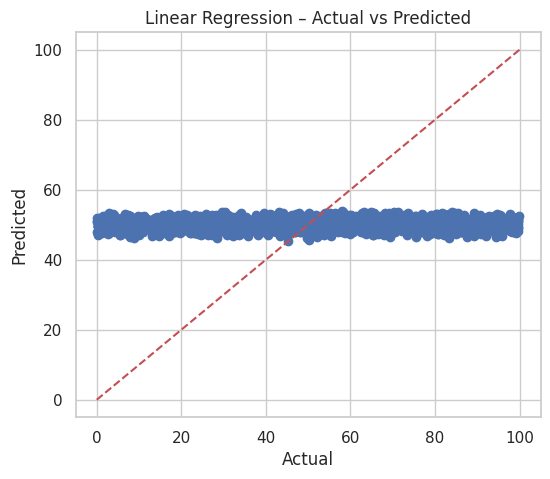


📊 Logistic Regression Accuracy: 0.9261904761904762


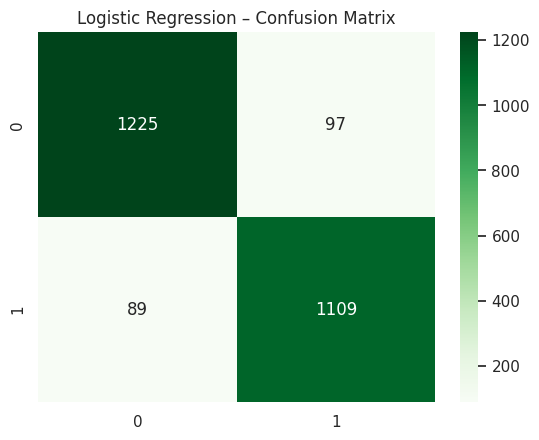

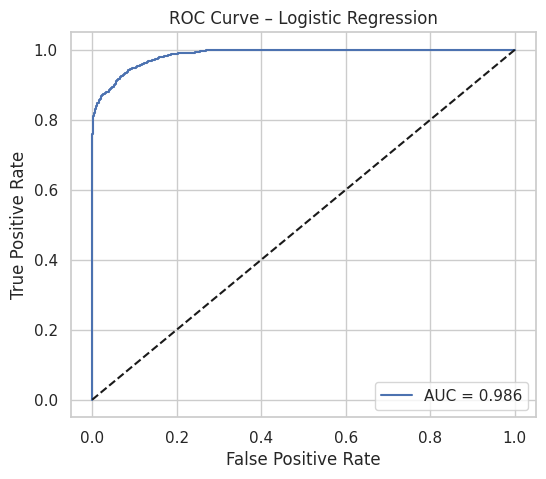


✅ PROJECT COMPLETE


In [14]:
# ==============================================================================
# DATA SCIENCE – COMPLETE ML PIPELINE
# Dataset: Athlete Performance Prediction (REAL DATA)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, mean_squared_error,
    r2_score, roc_curve, roc_auc_score
)

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

print("✅ Libraries imported")

# ------------------------------------------------------------------------------
# 2. LOAD DATA
# ------------------------------------------------------------------------------
csv_path = "/kaggle/input/athlete-performance-prediction-dataset/sports_performance_data.csv"
df = pd.read_csv(csv_path)

print(f"✅ Dataset loaded: {df.shape}")

# ------------------------------------------------------------------------------
# 3. DATA PREPARATION
# ------------------------------------------------------------------------------

# Date handling
df['Competition_Date'] = pd.to_datetime(df['Competition_Date'], errors='coerce')
df['Competition_Month'] = df['Competition_Date'].dt.month
df['Competition_Weekday'] = df['Competition_Date'].dt.weekday

# Target creation (binary classification)
median_perf = df['Performance_Metric'].median()
df['High_Performer'] = (df['Performance_Metric'] >= median_perf).astype(int)

print("✅ Target variable created")

# Encode categorical variables
df = pd.get_dummies(
    df,
    columns=['Sport_Type', 'Training_Intensity', 'Altitude_Training'],
    drop_first=True
)

# Drop non-useful columns
df.drop(
    columns=['Athlete_ID', 'Athlete_Name', 'Event', 'Competition_Date'],
    inplace=True
)

# ------------------------------------------------------------------------------
# 4. HANDLE MISSING VALUES
# ------------------------------------------------------------------------------
X = df.drop(columns=['High_Performer'])
y = df['High_Performer']

# Convert any remaining non-numeric columns to numeric, coercing errors.
# This handles cases where unexpected strings (like 'Major') might be present
# in columns that should be numerical, turning them into NaNs suitable for imputation.
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Artificial missing values (to show cleaning process)
np.random.seed(42)
X_dirty = X.copy()
for col in X_dirty.columns:
    X_dirty.loc[X_dirty.sample(frac=0.05).index, col] = np.nan

imputer = SimpleImputer(strategy="mean")
X_clean_array = imputer.fit_transform(X_dirty)

# Check if the number of columns match, if not, adjust column names for DataFrame creation
if X_clean_array.shape[1] != len(X.columns):
    print(f"Warning: Imputer changed column count from {len(X.columns)} to {X_clean_array.shape[1]}. Adjusting column names.")
    # Slice X.columns to match the output array's dimension. This assumes order is preserved.
    X_clean_columns = X.columns[:X_clean_array.shape[1]]
else:
    X_clean_columns = X.columns

X_clean = pd.DataFrame(X_clean_array, columns=X_clean_columns)

print("✅ Missing values handled")

# ------------------------------------------------------------------------------
# 5. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(
    x=X_clean['Training_Hours_per_Week'],
    hue=y,
    kde=True,
    element="step"
)
plt.title("Training Hours vs Performance Level")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(
    X_clean.iloc[:, :10].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix (Top 10 Features)")
plt.show()

# ------------------------------------------------------------------------------
# 6. TRAIN / TEST SPLIT
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split completed")

# ------------------------------------------------------------------------------
# 7. RANDOM FOREST CLASSIFIER
# ------------------------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print("\n🌲 Random Forest Accuracy:", accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))

sns.heatmap(
    confusion_matrix(y_test, y_rf),
    annot=True, fmt="d", cmap="Blues"
)
plt.title("Random Forest – Confusion Matrix")
plt.show()

# ------------------------------------------------------------------------------
# 8. LINEAR REGRESSION (NUMERIC PERFORMANCE)
# ------------------------------------------------------------------------------
y_reg = df['Performance_Metric']
X_reg = df.drop(columns=['Performance_Metric', 'High_Performer'])

# Ensure X_reg columns are numeric before imputation for regression
for col in X_reg.columns:
    if X_reg[col].dtype == 'object':
        X_reg[col] = pd.to_numeric(X_reg[col], errors='coerce')

imputer_reg = SimpleImputer(strategy="mean")
X_reg_array = imputer_reg.fit_transform(X_reg)

# Check if the number of columns match, if not, adjust column names for DataFrame creation
if X_reg_array.shape[1] != len(X_reg.columns):
    print(f"Warning: Imputer changed column count for X_reg from {len(X_reg.columns)} to {X_reg_array.shape[1]}. Adjusting column names.")
    # Slice X_reg.columns to match the output array's dimension. This assumes order is preserved.
    X_reg_columns = X_reg.columns[:X_reg_array.shape[1]]
else:
    X_reg_columns = X_reg.columns

X_reg = pd.DataFrame(X_reg_array, columns=X_reg_columns)

# Impute missing values in the target variable for regression (y_reg)
y_reg_imputed = y_reg.fillna(y_reg.mean())

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg_imputed, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)

yr_pred = lin_reg.predict(Xr_test)

print("\n📈 Linear Regression R²:", r2_score(yr_test, yr_pred))
print("📈 Linear Regression MSE:", mean_squared_error(yr_test, yr_pred))

plt.figure(figsize=(6, 5))
plt.scatter(yr_test, yr_pred)
plt.plot(
    [yr_test.min(), yr_test.max()],
    [yr_test.min(), yr_test.max()],
    'r--'
)
plt.title("Linear Regression – Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# ------------------------------------------------------------------------------
# 9. LOGISTIC REGRESSION
# ------------------------------------------------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_log = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("\n📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_log))

sns.heatmap(
    confusion_matrix(y_test, y_log),
    annot=True, fmt="d", cmap="Greens"
)
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve – Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("\n✅ PROJECT COMPLETE")